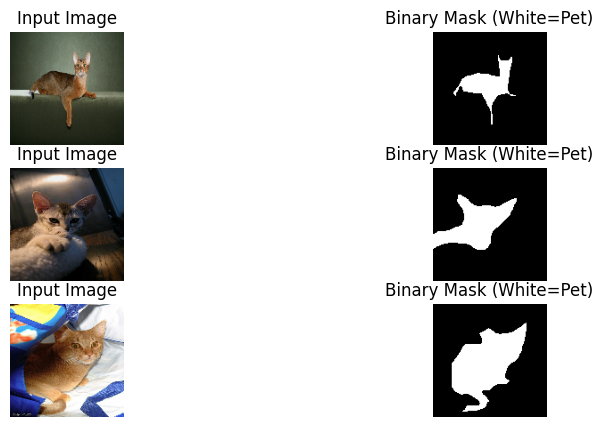

In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src') # Allow importing from src
from dataset import PetDataset

# Initialize
# Point this to where your 'images' and 'annotations' folders live
DATA_PATH = "../data/raw/Oxford-IIT-Pet-Dataset-Annotations/" 
loader = PetDataset(root_dir=DATA_PATH, img_size=(128, 128))

# Get Training Data
train_ds = loader.get_dataset(split='train')

# Take one batch
images, masks = next(iter(train_ds))

# Visualize
plt.figure(figsize=(10, 5))
for i in range(3):
    # Plot Image
    plt.subplot(3, 2, i*2 + 1)
    plt.imshow(images[i])
    plt.title("Input Image")
    plt.axis("off")
    
    # Plot Mask
    plt.subplot(3, 2, i*2 + 2)
    # Squeeze removes the (128,128,1) -> (128,128) for plotting
    plt.imshow(masks[i].numpy().squeeze(), cmap='gray') 
    plt.title("Binary Mask (White=Pet)")
    plt.axis("off")

plt.show()

In [3]:
# Add src to path if needed
import sys
sys.path.append('../src')

from models import build_unet

# Test Variation 1: Standard (Max Pool + Transpose)
model_1 = build_unet((128, 128, 3), downsample_mode='mp', upsample_mode='tr')
print(f"Model 1 Output Shape: {model_1.output_shape}") 
# Should be (None, 128, 128, 1)

# Test Variation 2: Assignment Special (Strided Conv + Upsampling)
model_2 = build_unet((128, 128, 3), downsample_mode='str_conv', upsample_mode='ups')
print(f"Model 2 Output Shape: {model_2.output_shape}")
# Should ALSO be (None, 128, 128, 1)

print("✅ Model Factory works!")

Model 1 Output Shape: (None, 128, 128, 1)
Model 2 Output Shape: (None, 128, 128, 1)
✅ Model Factory works!


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


: 